In [241]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 

In [242]:
print(pd.__version__)

# checking to make sure our virtual environment is running correctly 

2.1.0


In [243]:
df = pd.read_csv('healthcare.csv')

In [244]:
df.head(10)

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1
5,6,5,116,74,0,0,25.6,0.201,30,0
6,7,3,78,50,32,88,31.0,0.248,26,1
7,8,10,115,0,0,0,35.3,0.134,29,0
8,9,2,197,70,45,543,30.5,0.158,53,1
9,10,8,125,96,0,0,0.0,0.232,54,1


In [245]:
df.isna().sum()

# data seems pretty good to use

Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [246]:
X = df.drop(columns=['Id', 'Outcome'])

In [247]:
X.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [248]:
y = df['Outcome']
y.head(5)

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [249]:
# perform a training test split 
X_train, X_test, y_train, y_test = train_test_split(X,y)


In [250]:
print(y_test.shape)
print(X_train.shape)

c, b = X.shape
print(c)
print(b)

(692,)
(2076, 8)
2768
8


#### Sigmoid Function
In this function, we are first coding the sigmoid function so once we compute our z value which consists of a dot product of our input features and weight parameters and bias. This computes a value between 0 and 1 which is necessary for binary logistic classification

In [251]:
# create the sigmoid activation function for logistic regression (return output of 0 or 1)

def sigmoid(x):
    
    g = 1 / (1 + np.exp(-x))
    
    
    return g



In [252]:
print(sigmoid(0))

0.5


#### Cost Function

We code the cost function which in this case is the binarycross entropy cost function which is different from MSE which we use for linear regression. We compute the cost function, so we know that it is decreasing after each iteration

In [253]:
def cost_one(actual, out):
    cost = actual*np.log(out)+(1-actual)*np.log(1-out)
    
    return cost

In [254]:
# implement gradient descent one iteration


def gradient_descent(X, y, w, b, sig, cost_one):
    
    m, n = X.shape
    dj_dw = np.zeros(n)
    dj_db = 0
    total_cost = 0
    
    for i in range(m):
        out = np.dot(X[i], w) + b
        apply_sig = sig(out) - y[i]
        total_cost += cost_one(y[i], sig(out))
        for j in range(n):
            dj_dw[j] += apply_sig * X[i][j] # access two dimensional arrays
        dj_db += apply_sig
        
        
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    total_cost = total_cost / -m
            
    return dj_dw, dj_db, total_cost # return the partial derivatives of both 

    
        
    
    


In [255]:
# run multiple iterations
            
            
w = np.zeros(X.shape[1])
b = 0
total_cost = 0


X_train = X_train.to_numpy()
y_train = y_train.to_numpy()
  
    

def full_gradient(X, y, w_in, b_in, grad_desc, sig, lr, epochs, cost_one):
    
    costs = []
    
    for i in range(epochs):
        dj_dw, dj_db, curr_cost = grad_desc(X, y, w_in, b_in, sig, cost_one)
        w_in = w_in - lr * dj_dw
        b_in = b_in - lr * dj_db
        if (i % 10 == 0):
            costs.append(curr_cost)
        
    return w_in, b_in, costs # return final parameters after running gradient descent multiple times

    


In [256]:
final_w, final_b, costs = full_gradient(X_train, y_train, w, b, gradient_descent, sigmoid, 0.001, 1000, cost_one)

/var/folders/4k/v82rk11s3q19pdylvw_t8zg40000gn/T/ipykernel_79993/2432688397.py:2: RuntimeWarning: divide by zero encountered in log
  cost = actual*np.log(out)+(1-actual)*np.log(1-out)
/var/folders/4k/v82rk11s3q19pdylvw_t8zg40000gn/T/ipykernel_79993/2432688397.py:2: RuntimeWarning: invalid value encountered in scalar multiply
  cost = actual*np.log(out)+(1-actual)*np.log(1-out)


In [257]:
print(final_w)
print(final_b)
print(costs)

[ 1.42778697  0.39182836 -0.60238561 -0.01565123  0.1569647   0.16645775
  0.05351535  0.05478235]
-0.346196956562445
[0.6931471805599105, 55.920283248098016, nan, nan, nan, 47.42656968463545, nan, nan, 13.718312060351645, 50.1003246458795, 44.10562158647382, 37.01018648755356, nan, nan, 35.93482038441522, nan, 47.78644782397676, 35.98089766017745, 48.846256713399384, nan, nan, 46.62940678364199, nan, nan, 40.81355609881105, 39.05868901525913, nan, nan, nan, 48.572948422847816, nan, nan, 41.64848218736075, 47.85678951835546, 40.95658301844816, 21.05447380497796, nan, nan, 48.01038816822448, 39.64996236709691, nan, 46.58447024601584, nan, nan, 30.435750387030367, nan, 24.531665864774357, nan, nan, nan, 34.419565622781256, 48.922242507724214, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 39.77272899598403, nan, nan, nan, 35.82666951972879, nan, nan, nan, nan, nan, 32.266559677049734, nan, nan, 38.4097001595307, nan, 37.55569199666892, nan, nan, nan, nan, 29.9

#### cost function analysis

It seems to be oscillating, maybe we can try feature scaling?

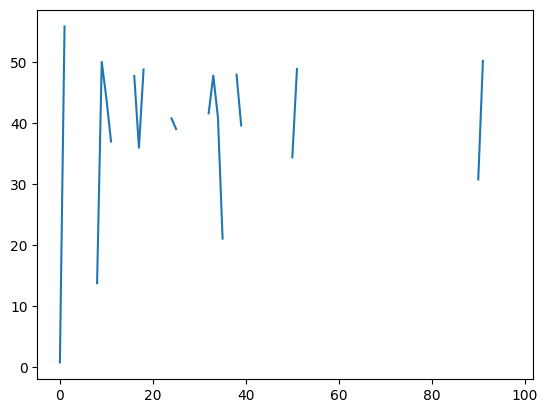

In [259]:
plt.plot(list(range(100)), costs)

#### importance of feature scaling

Here we apply the standard scale which standardizes our data. This means that our mean is centered around zero and 

In [260]:
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)


final_w, final_b, costs_1 = full_gradient(X_train_standardized, y_train, w, b, gradient_descent, sigmoid, 0.01, 1000, cost_one)


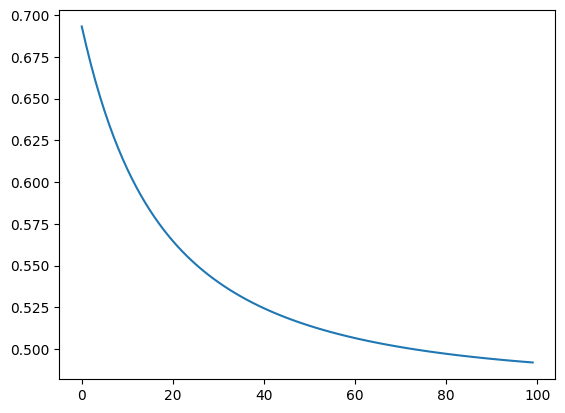

In [261]:
plt.plot(list(range(100)), costs_1)

In [262]:
print(costs_1)

[0.6931471805599105, 0.6813824176773847, 0.6705148889528552, 0.6604666888768811, 0.651165841636192, 0.6425462689961566, 0.6345476116681767, 0.6271149497926288, 0.6201984602429724, 0.6137530403123329, 0.6077379198679492, 0.6021162776887699, 0.59685487256385, 0.5919236957649701, 0.5872956485637316, 0.5829462463574475, 0.5788533495185229, 0.5749969201296025, 0.5713588031794774, 0.5679225304681847, 0.5646731453242825, 0.5615970462131534, 0.5586818473696176, 0.555916254689938, 0.5532899552463241, 0.5507935189267751, 0.54841831084463, 0.5461564132998684, 0.5440005562039985, 0.5419440550005614, 0.5399807552228412, 0.5381049829294113, 0.5363115003467549, 0.5345954661271494, 0.5329523997000228, 0.531378149256827, 0.5298688629640557, 0.5284209630469819, 0.5270311224288806, 0.5256962436476188, 0.5244134398039176, 0.5231800173242528, 0.5219934603463399, 0.520851416557262, 0.5197516843335174, 0.518692201049406, 0.5176710324350137, 0.5166863628783067, 0.5157364865773877, 0.5148197994592829, 0.513934

In [ ]:
# creating our predictions

In [264]:
# our accuracy

In [ ]:
# improving performance?

In [263]:
# testing our model

In [ ]:
# other visualizations (plotting decision boundary?)